In [1]:
import re
import numpy as np
import math
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn import preprocessing, model_selection

# Data

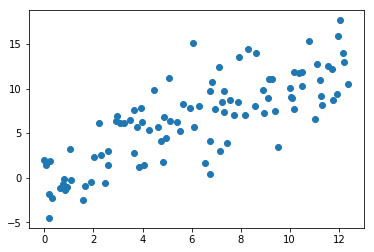

In [2]:
n = 100
X = np.random.uniform(0,4*np.pi, size=(n,1))
y = X + np.random.normal(0,3,size=(n,1))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.9, random_state=42)

plt.scatter(X, y)

# Optimal Encoding

In [3]:
from networks import MLP
from OptimalEncoding import OptimalEncoding

Instructions for updating:
Use the retry module or similar alternatives.


## Regression

In [33]:
n_in = X.shape[-1]
k = 200
n_out = X.shape[-1]

widths = [300, 300]
depth = len(widths)

In [34]:
encoder = MLP(n_in, k, depth, widths)
decoder = MLP(k, n_out+1, depth, widths)

In [35]:
oe = OptimalEncoding(encoder, decoder, k)

100%|██████████| 10000/10000 [00:30<00:00, 331.34it/s]


Sigma: 0.100000
Final task loss: 1.761000


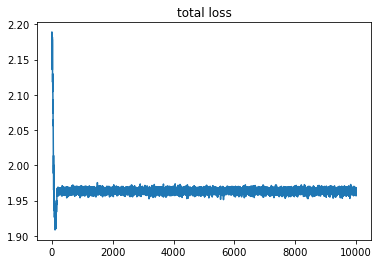

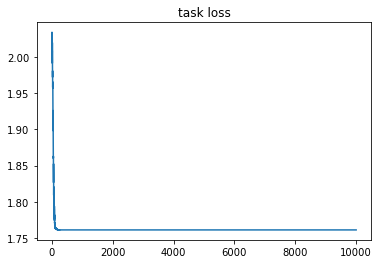

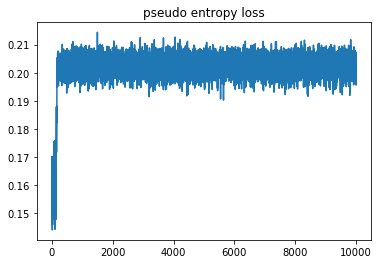

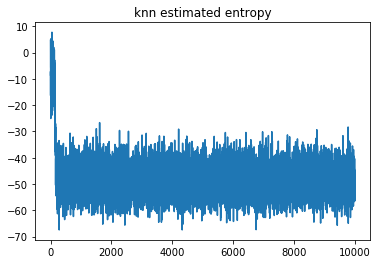

In [36]:
oe.train(X_train, y=y_train, min_entropy=True, epochs=10000, batch_size=10, lr=1e-4, sigma = .1, task = 'autoencoder', heteroskedastic=True)

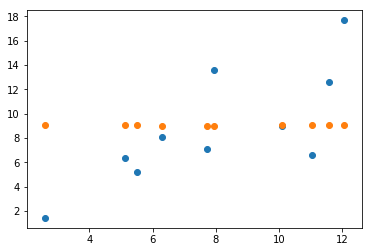

In [37]:
zhat = oe.encode(X_train)
yhat = oe.decode(zhat)
plt.scatter(X_train, y_train)
plt.scatter(X_train, yhat)

(array([ 1.,  0.,  3.,  0.,  2.,  0.,  0.,  1.,  1.,  2.]),
 array([ 0.00625737,  0.00797091,  0.00968444,  0.01139797,  0.0131115 ,
         0.01482503,  0.01653857,  0.0182521 ,  0.01996563,  0.02167916,
         0.0233927 ]),
 <a list of 10 Patch objects>)

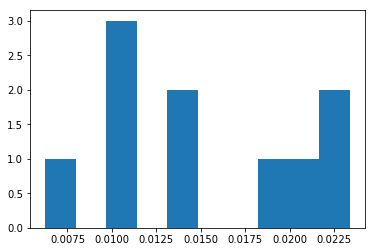

In [38]:
plt.hist(zhat[:,0])

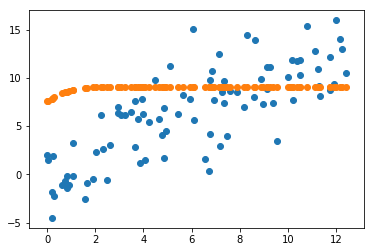

In [39]:
zhat = oe.encode(X_test)
yhat = oe.decode(zhat)
plt.scatter(X_test, y_test)
plt.scatter(X_test, yhat)

# SubOptimal Encoding

## Regression

In [47]:
n_in = X.shape[-1]
k = 300
n_out = X.shape[-1]

widths = [300, 300]
depth = len(widths)

In [48]:
encoder = MLP(n_in, k, depth, widths)
decoder = MLP(k, n_out+1, depth, widths)

In [49]:
oe = OptimalEncoding(encoder, decoder, k, activation=None)

100%|██████████| 10000/10000 [00:32<00:00, 311.25it/s]


Sigma: 0.000000
Final task loss: -0.119482


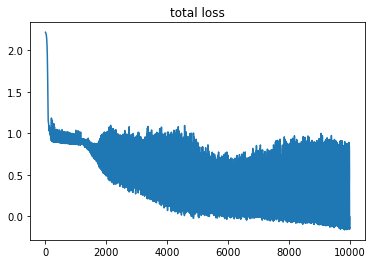

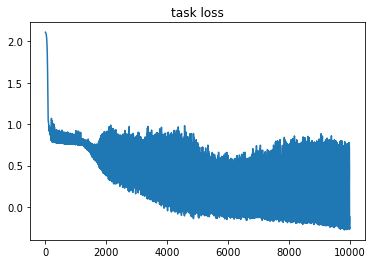

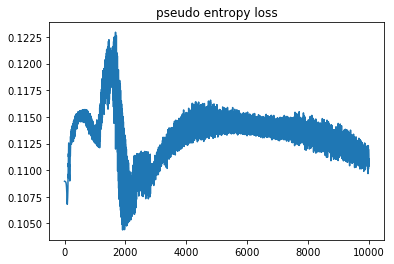

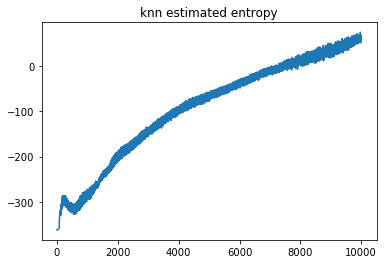

In [50]:
oe.train(X_train, y=y_train, min_entropy=False, epochs=10000, batch_size=10, lr=1e-4, sigma = 0, task = 'autoencoder', heteroskedastic=False)

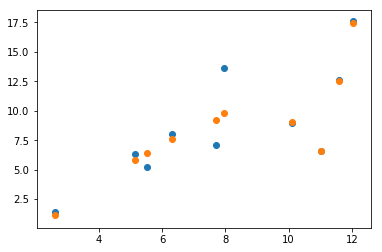

In [51]:
zhat = oe.encode(X_train)
yhat = oe.decode(zhat)
plt.scatter(X_train, y_train)
plt.scatter(X_train, yhat)

(array([ 2.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  4.]),
 array([-0.10879262,  0.00495794,  0.1187085 ,  0.23245906,  0.34620962,
         0.45996018,  0.57371075,  0.68746131,  0.80121187,  0.91496243,
         1.02871299]),
 <a list of 10 Patch objects>)

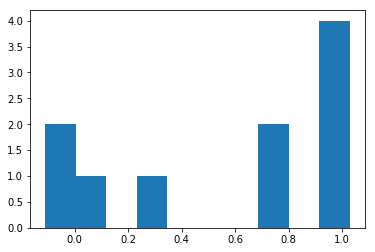

In [52]:
plt.hist(zhat[:,0])

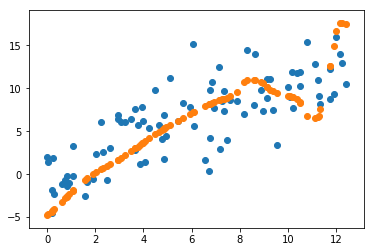

In [53]:
zhat = oe.encode(X_test)
yhat = oe.decode(zhat)
plt.scatter(X_test, y_test)
plt.scatter(X_test, yhat)